In [42]:
import tensorflow as tf
import os

In [43]:
import cv2
import imghdr

In [44]:
data_dir= '/content/drive/MyDrive/data'

In [45]:
image_exts = ['jpeg','jpg','bmp','png']


In [46]:
happy_images = os.listdir(os.path.join(data_dir,'happy'))
sad_images = os.listdir(os.path.join(data_dir,'sad'))

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      print(img.shape)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in the correct format")
        os.remove(image_path)
    except Exception as e:
      print("Issue with the image")


In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [ ]:
for d in data:
  print(d)

In [75]:
data_iter = data.as_numpy_iterator()

In [76]:
batch = data_iter.next()

In [77]:
batch[0].shape

(32, 256, 256, 3)

In [85]:
data = data.map(lambda x,y:(x/255,y))

In [86]:
scaled_val = data.as_numpy_iterator()

In [87]:
batch = scaled_val.next()

AttributeError: ignored

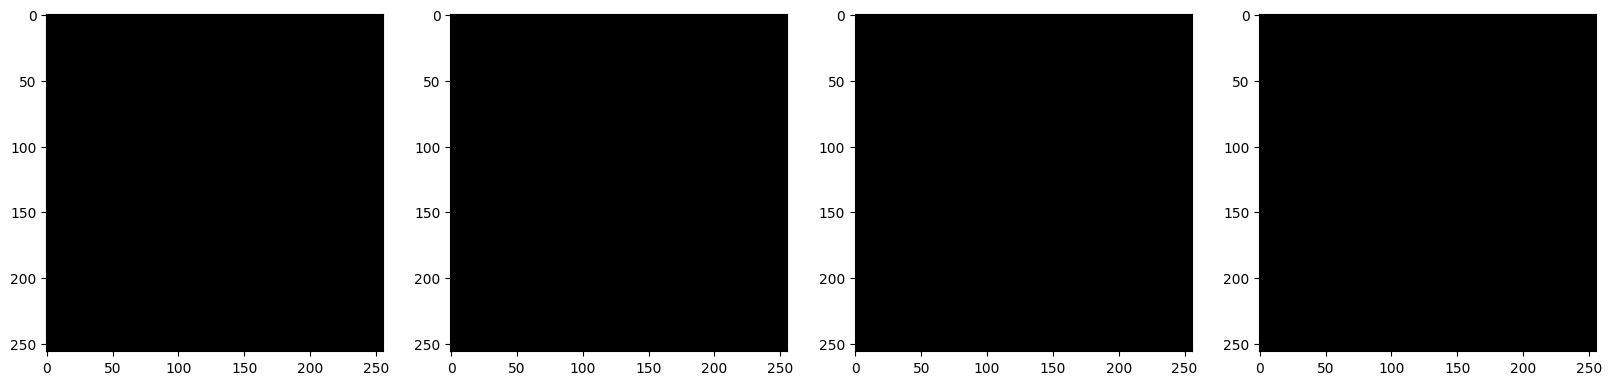

In [90]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)

